<img src="assets/logo.png" width="800">

# Labor 11 - K-means klaszterezés

A tanuló algoritmusok (Machine Learning) főbb csoportjait az alábbi ábra szemlélteti, melyek közül egyik főbb csoport a felügyelet nélküli tanító algortimusok (unsupervised learning) csoportja.

<img src="assets/Lab11/Pics/L11_groups.png" width="800">

Korábbi laborjaink során részletesen megismerkedtünk a felügyelt tanulással (Supervised Learning) és ennek eseteivel, osztályozás és regresszió. Ebben a gyakorlatban a felügyelet nélküli tanulás (Unsupervised Learning) és azon belül is a klaszterezés lesz a téma. 

Mikor lehet szükség felügyelet nélküli tanításra?
Olyan esetekben például, amikor nem ismerjük a kimenetet, de valamiféle mintát keresünk az adatunkban. Piaci résztvevők elemzése, felbontása vagy kapcsolati háló elemzés. 

<img src="assets/Lab11/Pics/L11_example.png" width="800">

Célunk lehet ilyenkor, hogy meghatározzunk kisebb összetartozó csoportokat, más néven klasztereket. Erre egy lehetséges megoldás a K-means algoritmus használata.

### 1: Adatok beolvasása

Kezdeti adataink 2D pontok lesznek. 

X shape: (300, 2)


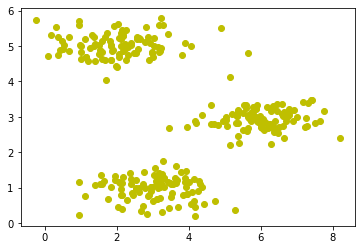

In [34]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


data = loadmat("Lab11data.mat")
X = data["X"]
plt.plot(X[:,0],X[:,1], 'yo')
print('X shape:',X.shape)

Ránézésre azt mondanánk, hogy az adathalmazba felfedezhető struktúra szerint 3 klaszterbe sorolhatóak az adatok. A K-Means algoritmus működését tekintve, pedig meg kell határoznunk a lehetséges klaszterek számát. Legyen tehát ez most 3. 

A kezdeti klaszter középpontok meghatározása történhet explicit megadással vagy véletlenszerűen.
Továbbá lehetnek a mintából választott pontok vagy akár a mintahalmazban nem szereplő kiindulási pontok is. 

Amire figyelni kell, hogy a K (mint klaszterek száma kisebb legyen mint a minta szám)

Páldánkban előre meghatároztuk a 3 kiindulási klaszter középpont koordinátáit.

Középpontok kezdeti értéke:
 [[3 3]
 [6 2]
 [8 5]]


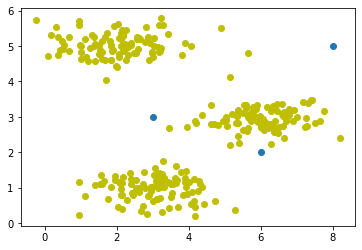

In [18]:
K = 3                                                           # klaszterszám
init_centroids = np.array([[3,3],[6,2],[8,5]])                  # kezdeti értékek a klaszterek középpontjához
print('Középpontok kezdeti értéke:\n',init_centroids)

plt.plot(X[:,0],X[:,1], 'yo')
plt.plot(init_centroids[:,0],init_centroids[:,1], 'o')

Következő lépésként minden a mintahalmazban szereplő pontról el kell döntenünk, hogy melyik klaszterbe tartozik, vagyis melyik klaszter középponthoz áll a legközelebb.

### 2: Legközelebbi középpont megtalálása

Írjuk meg az alábbi függvényt, amely minden ponthoz hozzárendeli a legközelebbi klaszter középpont indexét. 

Két pont között a távolságot a Pitaghoras tétel segítségével számolhatjuk. <br>
Legyen a két pontunk $P_1(x_1, y_1)$ és $P_2(x_2, y_2)$. 

A távolság a következő képpen számolható: <br>

$d = \sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$ <br>

Az összehasonlítás szempontjából a gyökvonás elhagyható és számolhatunk $d^2$-el is.

In [20]:
def findClosestCentroids(X,centroids):    
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1))
################################################    
    for i in range(X.shape[0]):
        distance = np.Inf
        for k in range(K):
            temp2 = X[i,:]-centroids[k,:]
            dis_t = temp2 @ temp2.T
            if (dis_t<distance):
                distance = (temp2 @ temp2.T)
                temp1 = k
        idx[i] = temp1
################################################    
    return idx

idx = findClosestCentroids(X,init_centroids)
print('Closest centroids for the first 3 examples (expected: 0-2-1):\n',idx[0:3])

Closest centroids for the first 3 examples (expected: 0-2-1):
 [[0.]
 [2.]
 [1.]]


### 3: Középértékek meghatározása

Miután besoroltunk minden pontot egy klaszterbe felül kell vizsgálnunk az új klaszter középpontokat. Újra kell számolnunk a klaszterek súlypontját a klaszterbe sorolt pontok figyelembe vételével. Ezzel fogjuk léptetni a klaszter középpontokat.

In [24]:
def computeCentroids(X,idx,K):
    
    m,n = X.shape
    centroids = np.zeros((K,n))
    cent = []
################################################    
    for k in range(K):
        cent = np.zeros((1,n))
        Ck = 0
        for i in range(m):
            if idx[i] == k:
                cent = cent + X[i,:]
                Ck = Ck + 1
        centroids[k,:] = cent * (1 / Ck)
################################################    
    return centroids

centroids = computeCentroids(X,idx,K)
print("""Centroids computed after initial finding of closest centroids:
(expected values):
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
 Computed:
 """, centroids)

Centroids computed after initial finding of closest centroids:
(expected values):
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
 Computed:
  [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


### 4: K-Means klaszterezés

A K-means algoritmus lépéseit (pontok klaszterekbe sorolása, középpontok léptetése) ezután egy leállási feltételig futtatjuk. Ez a feltétel lehet az, hogy a középpontok már nem változnak, vagy a változás egy meghatározott kis intervallumon belül marad vagy egy előírt iterációig futtatjuk az algoritmust. Ebben a példában az utóbbi megoldást választottuk és 5 iterációig fogjuk futtatni az algoritmust.

Running the 1 iteration of 5


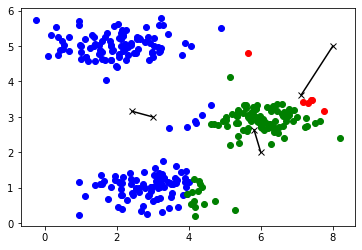

Running the 2 iteration of 5


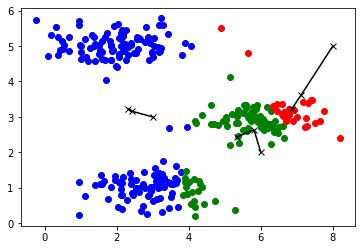

Running the 3 iteration of 5


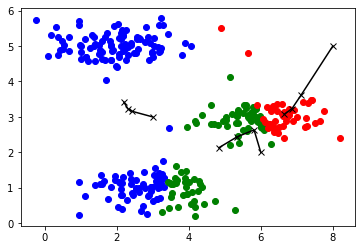

Running the 4 iteration of 5


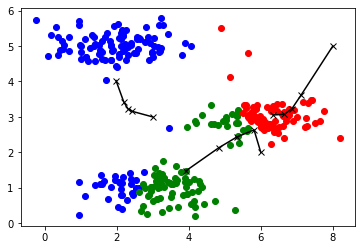

Running the 5 iteration of 5


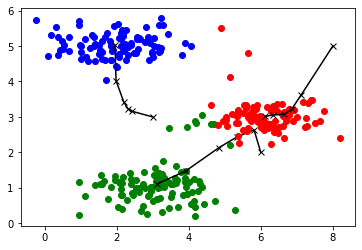

Centroids computed by the algorithm:
Expected:
[[1.95399466 5.02557006]
 [3.12663743 1.1121712 ]
 [6.12919526 3.01606258]]
Computed:
 [[1.95399466 5.02557006]
 [3.12663743 1.1121712 ]
 [6.12919526 3.01606258]]
Centroids movements


In [25]:
def plotkMeans(idx,num_CL,C_H,it):
    colors = ('b','g','r','c','m','y','k')
    
    plt.figure
    for i in range(num_CL):
        CL_i = X[np.where(idx == i)[0],:]
        plt.plot(CL_i[:,0],CL_i[:,1], colors[i]+'o',)
        plt.plot(C_H[i,0,0:it+2],C_H[i,1,0:it+2],'kx-')

    plt.show()    
    return 0

def runkMeans(X,init_cents,max_iters,plotProgress= False):
    
    m, n = X.shape
    k = init_cents.shape[0]
    idx = np.zeros((m))
    centroids = init_cents
    cent_hist = np.zeros((init_cents.shape[0],init_cents.shape[1],max_iters+1))
    cent_hist[:,:,0] = init_cents
    
    # K-Means:
    for i in range(max_iters):

        print('Running the {} iteration of {}'.format(i+1,max_iters))
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, k)
        cent_hist[:,:,i+1] = centroids
        if plotProgress:
            plotkMeans(idx,init_cents.shape[0],cent_hist,i)
    
    return centroids, idx

K = 5
max_iters = 5
init_cents = np.array([[3,3],[6,2],[8,5]])

centroids, idx = runkMeans(X,init_cents,max_iters,True)
print("""Centroids computed by the algorithm:
Expected:
[[1.95399466 5.02557006]
 [3.12663743 1.1121712 ]
 [6.12919526 3.01606258]]
Computed:
""",centroids)

print('Centroids movements')

Láthatjuk, hogy az 5 iteráció során a kezdeti klaszter középpontjaink hogyan vándoroltak be a végleges helyükre, illetve az adathalmaz mintáinka besorolása ennek megfelelően hogyan változott. 

### 5: Problémák

A klaszterközéppontok megválasztásától függően (főleg random inicializálás esetén) az algoritmus kölönböző optimum helyzetbe fog eljutni. Továbbá rosszul elosztott klaszter középpontok választása esetén könnyen lokális optimumba ragadhat.

<img src="assets/Lab11/Pics/L11_Localopt.png" width="500">

Másik fontos kérdés, hogy a K értékét (klaszterek száma) hogyan válasszuk meg? <br>
Ez többnyire intuitív módon történik. Jól szeparálható esetekben több futtatás eredményét összehasonlítva használható egy úgynevezett könyök szabály. Ez meghatározza azt a pont, aminél nagyobbra választva a klaszterek számát már nem tapasztalható szignifikáns csökkenés a költség függvényben (itt a költségfüggvény a pontok és klaszter középpontok távolságának az összesége)

<img src="assets/Lab11/Pics/L11_Elbow.png" width="800">

Persze akadnak olyan esetek, amikor a könyök szabály nem alkalmazható. Például, amikor szeretnénk egy megközelítóleg lineáris eloszlású adathalmazt szeparálni. ilyen esetre példa a ruhaméretek meghatározása. Ebben az esetben megint csak ránk van bízva, hogy milyen részleteséggel szeretnénk beosztani a skálát.

<img src="assets/Lab11/Pics/L11_Size.png" width="800">

### 6: K-Means klaszterezés pixeleken

Végezetül egy extra példa K-means használatára. A következő példában egy kép színeit foglyuk a K-Means algoritmus segítségével kiválasztani, tömöríteni. A példa teljes mértékben játékpélda, a valóságban sokkal jobb algoritmusok létezenek erre a feladatra.

(128, 128, 3)
Initial Centroids:
 [[0.62352941 0.54509804 0.38823529]
 [0.09803922 0.10980392 0.09019608]]
Running the 1 iteration of 5
Running the 2 iteration of 5
Running the 3 iteration of 5
Running the 4 iteration of 5
Running the 5 iteration of 5
K-Means clustering done...


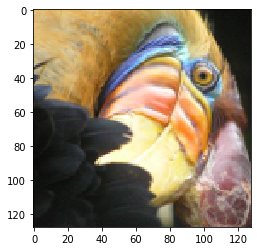

In [40]:
def kMeansInitCentroids(X,K):
    cents = np.zeros((K,X.shape[1]))
    randindx = np.random.permutation(X.shape[0])
    cents = X[randindx[0:K],:]
    
    return cents


image = loadmat("bird_small.mat")
A_o = image['A']
A = A_o / 255.
img_size = A.shape 
print(img_size)
plt.imshow(A)

X2 = A.reshape((int(A.size/3),3))

K =2
max_iters = 5
init_cents = kMeansInitCentroids(X2,K)
print('Initial Centroids:\n',init_cents)
centroids, idx = runkMeans(X2,init_cents,max_iters)
print('K-Means clustering done...')

### 6: A kép kompressziója

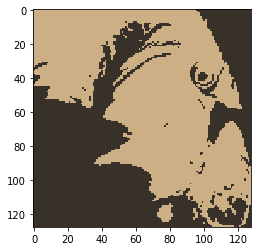

In [28]:
idx = findClosestCentroids(X2,centroids)

X_recovered = centroids[idx.astype(int),:]
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
plt.imshow(X_recovered)
plt.show()

<div style="text-align: right">Ez a laborgyakorlat felhasznál elemeket Andrew Ng Machine Learning c. kurzusából.</div>